# Tutorial #2 GridWorlds

In [1]:
%load_ext autoreload
%autoreload 2

This tutorial is an overview of the worlds available in the library 

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from environments.gridworlds.gridworlds_classic import *
from environments.gridworlds.gridworlds_toroidal import *
from environments.gridworlds.gridworlds_stocastic import *
from plots.gridworlds.gridworld_visualizer import *
from utils.policy_functions import *

from agents.pgp.pgp_softmax import SoftMaxPGP
from utils.policy_tools import *

np.set_printoptions(precision=2)

In [3]:
# Parameters
n_steps = 1000
alpha = 0.1

### Simple Mazes (deterministic actions, state based rewards)

OneDoor: this maze is a simple room with a bottleneck in the middle

/home/fran-tr/Workspace/gpp_core/utils/policy_functions.py:43: RuntimeWarning: divide by zero encountered in log
  return np.log(agent.A / np.sum(agent.A, axis=1, keepdims=True))


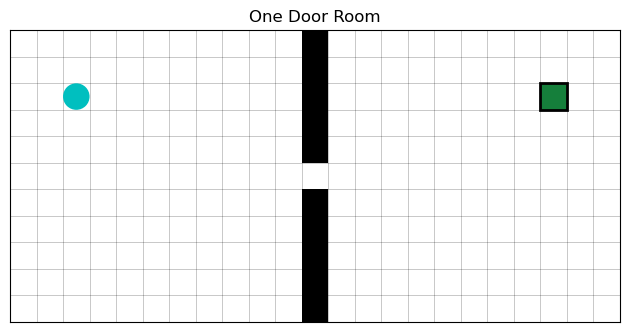

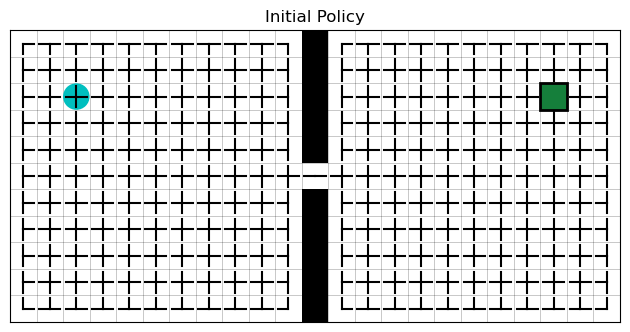

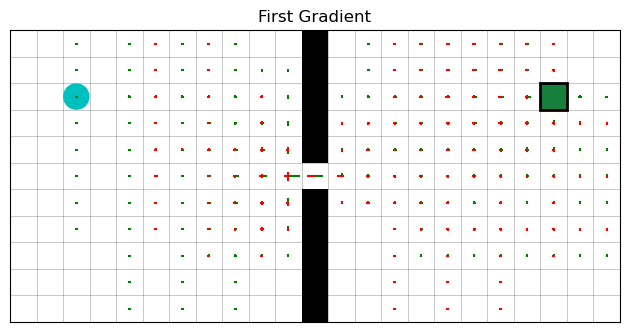

In [4]:
world = OneDoor()
agent = SoftMaxPGP(world, p0_func=p0_SR)
viz = GridWorldVisualizer(world, agent)

viz.plot_maze(plot_axis=False)
plt.title("One Door Room")
plt.tight_layout()
plt.show()

viz.plot_policy(plot_axis=False)
plt.title("Initial Policy")
plt.tight_layout()
plt.show()

viz.plot_gradient(plot_axis=False)
plt.title("First Gradient")
plt.tight_layout()
plt.show()



In [5]:
for s in range(agent.n_state):
    print("action probabilities: {}".format(agent.policy_vec()[s, :]))
    print("action allowed: {}".format(agent.A[s, :]))
    print("")



action probabilities: [0.  0.5 0.5 0. ]
action allowed: [False  True  True False]

action probabilities: [0.33 0.33 0.33 0.  ]
action allowed: [ True  True  True False]

action probabilities: [0.33 0.33 0.33 0.  ]
action allowed: [ True  True  True False]

action probabilities: [0.33 0.33 0.33 0.  ]
action allowed: [ True  True  True False]

action probabilities: [0.33 0.33 0.33 0.  ]
action allowed: [ True  True  True False]

action probabilities: [0.33 0.33 0.33 0.  ]
action allowed: [ True  True  True False]

action probabilities: [0.33 0.33 0.33 0.  ]
action allowed: [ True  True  True False]

action probabilities: [0.33 0.33 0.33 0.  ]
action allowed: [ True  True  True False]

action probabilities: [0.33 0.33 0.33 0.  ]
action allowed: [ True  True  True False]

action probabilities: [0.33 0.33 0.33 0.  ]
action allowed: [ True  True  True False]

action probabilities: [0.5 0.5 0.  0. ]
action allowed: [ True  True False False]

action probabilities: [0.   0.33 0.33 0.33]
action 

100%|██████████| 1000/1000 [00:05<00:00, 199.66it/s]


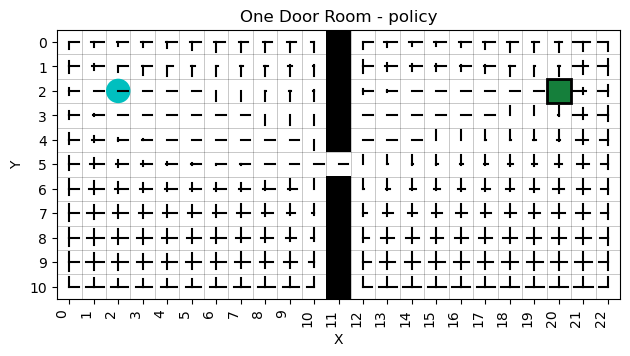

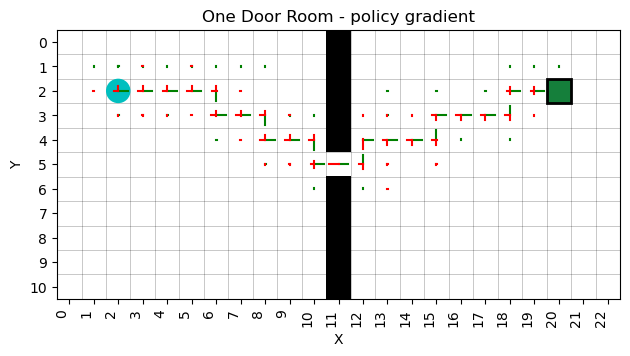

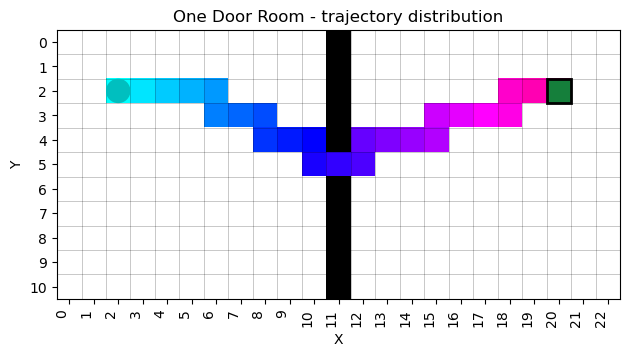

In [6]:
agent.reset()
agent.learn( n_steps=n_steps, alpha=alpha)

viz.plot_policy()
plt.title("One Door Room - policy")
plt.tight_layout()
plt.show()

viz.plot_gradient()
plt.title("One Door Room - policy gradient")
plt.tight_layout()
plt.show()

viz.plot_trajectory_distribution()
plt.title("One Door Room - trajectory distribution")
plt.tight_layout()
plt.show()

OneDoorTorus: This maze is similar to the previous one, but it is a Torus.

The agent can cross the borders of the maze and it ends up on the other side.

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:04<00:00, 210.70it/s]


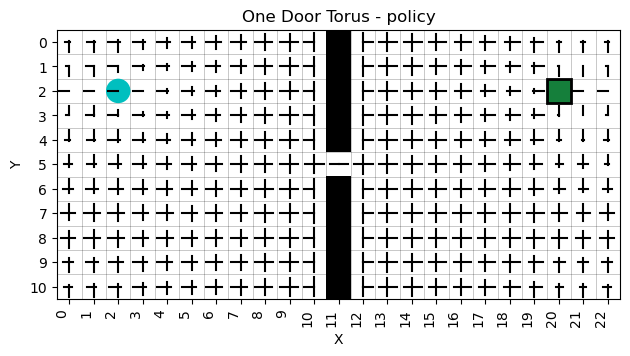

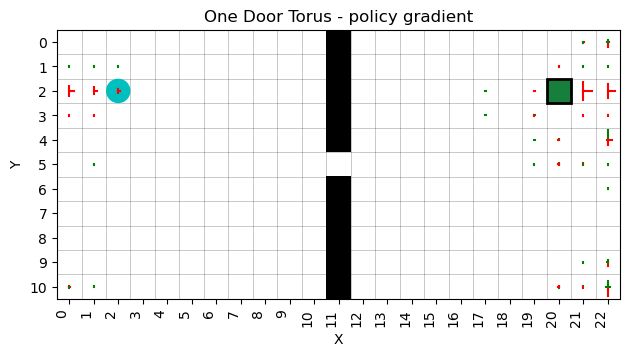

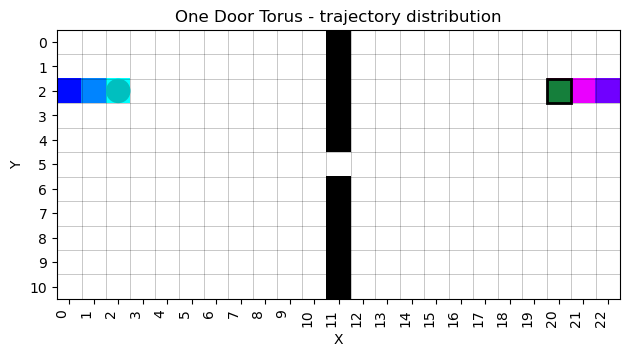

In [7]:
world = OneDoorTorus()
agent = SoftMaxPGP(world, p0_func=p0_SR)
viz = GridWorldVisualizer(world, agent)

agent.learn( n_steps=n_steps, alpha=alpha)

viz.plot_policy()
plt.title("One Door Torus - policy")
plt.tight_layout()
plt.show()

viz.plot_gradient()
plt.title("One Door Torus - policy gradient")
plt.tight_layout()
plt.show()

viz.plot_trajectory_distribution()
plt.title("One Door Torus - trajectory distribution")
plt.tight_layout()
plt.show()


In [8]:
soften_softmax_policy(agent)
agent.policy(3)

array([0.33, 0.28, 0.28, 0.12])

ForkedRoom:  a more complex environment with several rooms

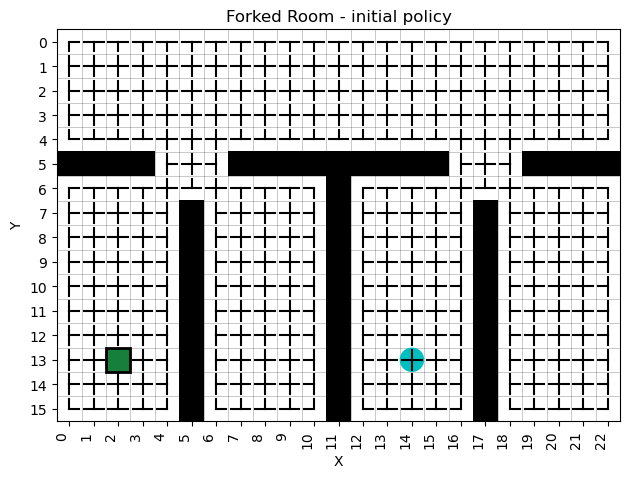

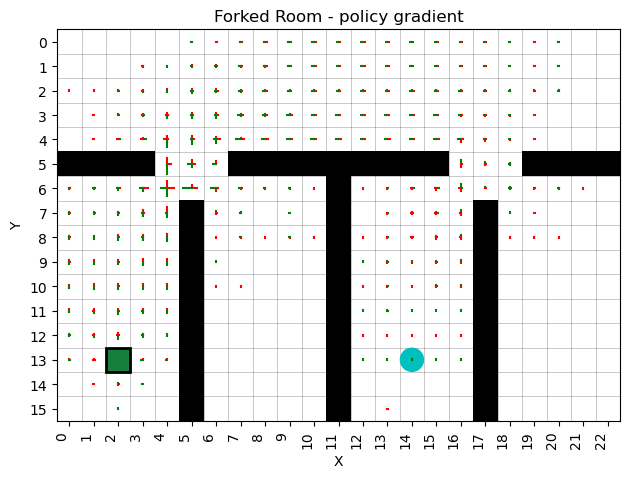

100%|██████████| 1000/1000 [00:08<00:00, 114.36it/s]


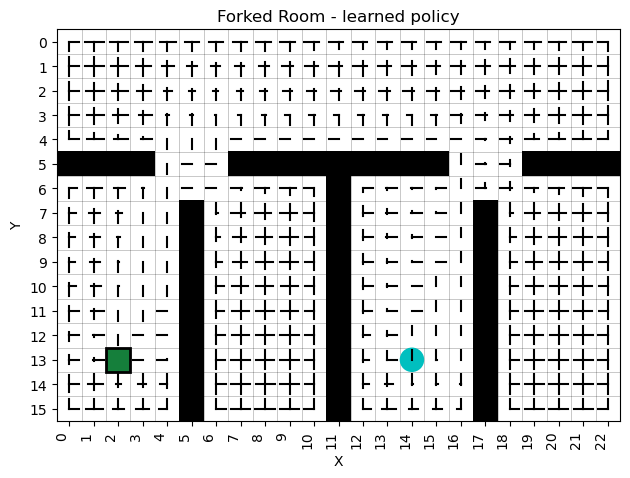

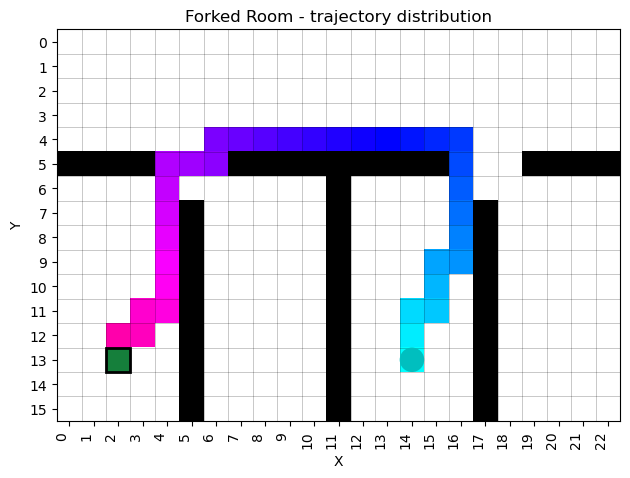

In [9]:
world = ForkedRoom()
agent = SoftMaxPGP(world, p0_func=p0_SR)
viz = GridWorldVisualizer(world, agent)

viz.plot_policy()
plt.title("Forked Room - initial policy")
plt.tight_layout()
plt.show()

viz.plot_gradient()
plt.title("Forked Room - policy gradient")
plt.tight_layout()
plt.show()

agent.learn( n_steps=n_steps, alpha=alpha)

viz.plot_policy()
plt.title("Forked Room - learned policy")
plt.tight_layout()
plt.show()


viz.plot_trajectory_distribution()
plt.title("Forked Room - trajectory distribution")
plt.tight_layout()
plt.show()

### Action-based reward Mazes

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:01<00:00, 654.69it/s]


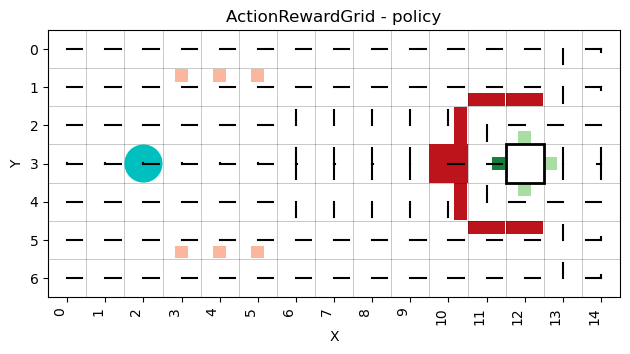

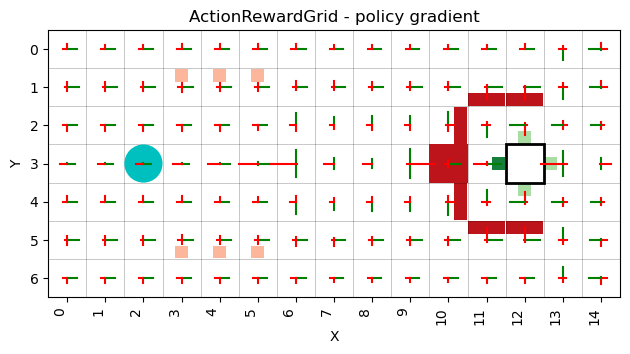

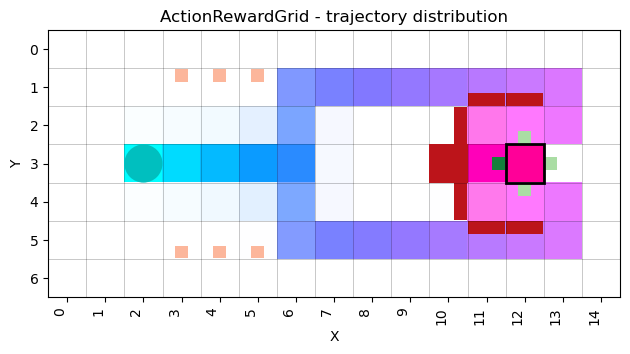

In [10]:
world = ActionRewardGrid()
agent = SoftMaxPGP(world, p0_func=p0_uniform)
viz = GridWorldVisualizer(world, agent)

agent.learn(n_steps=1000, alpha=0.1)

viz.plot_policy()
plt.title("ActionRewardGrid - policy")
plt.tight_layout()
plt.show()

viz.plot_gradient()
plt.title("ActionRewardGrid - policy gradient")
plt.tight_layout()
plt.show()

viz.plot_trajectory_distribution()
plt.title("ActionRewardGrid - trajectory distribution")
plt.tight_layout()
plt.show()

### Stocastic Mazes

WindyCliff: A stocastic environment where the outcome of actions is not fully predictable.

In this maze, at every t, there is a probability = [wind_prob] that the wind drags the agent one square down.

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:01<00:00, 556.56it/s]


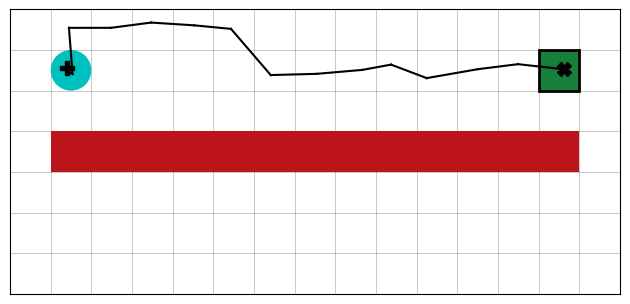

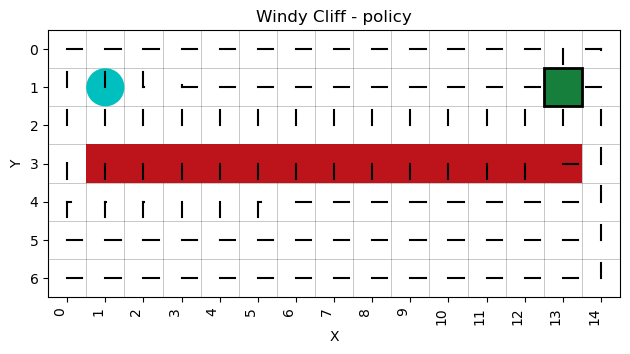

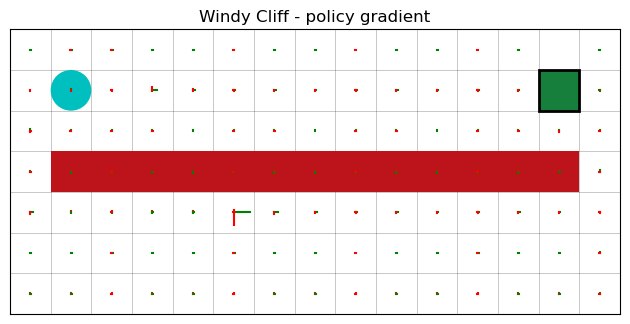

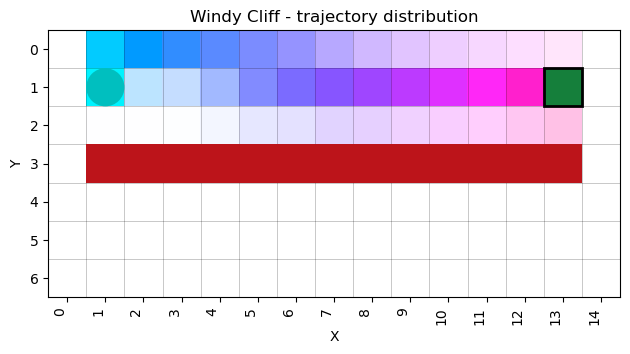

In [11]:
world = WindyCliff(wind_prob=0.2)
agent = SoftMaxPGP(world, p0_func=p0_uniform)
viz = GridWorldVisualizer(world, agent)

agent.learn( n_steps=n_steps, alpha=alpha)

viz.plot_trajectory(plot_axis=False, greedy=True)
plt.tight_layout()
plt.show()

viz.plot_policy()
plt.title("Windy Cliff - policy")
plt.tight_layout()
plt.show()

viz.plot_gradient(plot_axis=False)
plt.title("Windy Cliff - policy gradient")
plt.tight_layout()
plt.show()

viz.plot_trajectory_distribution()
plt.title("Windy Cliff - trajectory distribution")
plt.tight_layout()
plt.show()

Different levels of wind make the agent converge towards different policies.

It is interesting to notice how in the "Strong Wind" scenario in some states the agent takes advantage of the wind to jump across the cliff.

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:01<00:00, 626.43it/s]


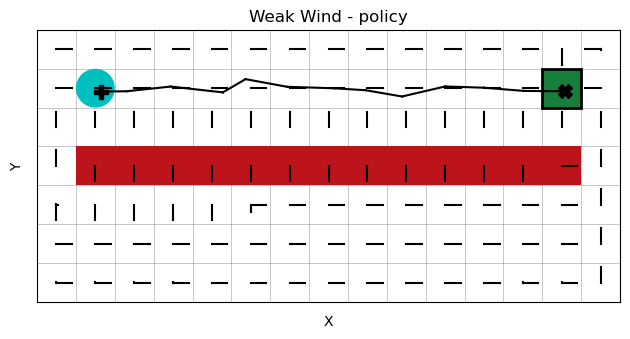

100%|██████████| 1000/1000 [00:01<00:00, 577.78it/s]


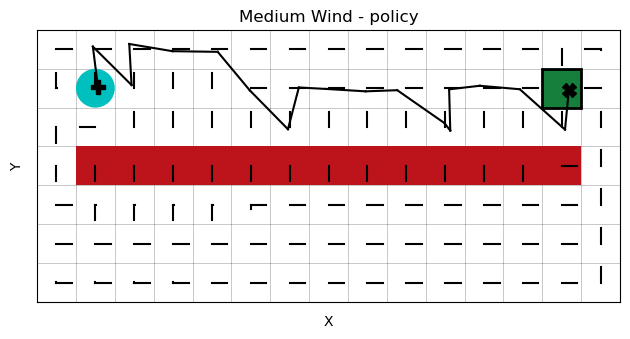

100%|██████████| 1000/1000 [00:01<00:00, 642.44it/s]


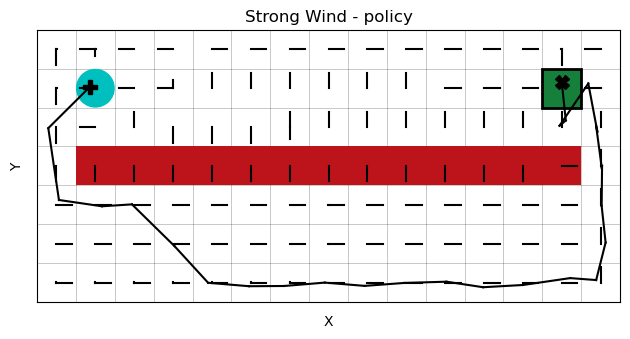

In [12]:
wind_levels = [0.1, 0.3, 0.7]
wind_labels = ["Weak", "Medium", "Strong"]

for wind, label in zip(wind_levels, wind_labels):

    world =  WindyCliff(wind_prob=wind)
    agent = SoftMaxPGP(world, gamma=0.99, p0_func=p0_uniform)
    viz = GridWorldVisualizer(world, agent)

    agent.learn(n_steps=n_steps, alpha=alpha)

    viz.plot_policy()
    viz.plot_trajectory(plot_maze=False, plot_axis=False, greedy=False)
    plt.title("{} Wind - policy".format(label))
    plt.tight_layout()
    plt.show()